# WineQT - K-Nearest Neighbors
Denna notebook berör datasetet från WineQT.csv och en predikering med hjälp av KNN.

#### Importerar bibliotek

In [45]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler


#### Importerar data

In [46]:
wine_data = pd.read_csv('WineQT.csv')

#### Grundläggande analys
Vi ser ut att ha ett fullt dataset med 1143 datapunkter. Bortsett från 'quality' har vi 12 attribut att arbeta med, men bör koppla bort Id då detta inte bör ha någon inverkan på vinets faktiska kvalité.

In [47]:
display(wine_data.head())
display(wine_data.tail())
display(wine_data.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


#### Beskär datan

In [48]:
trimmed_data = wine_data.drop('Id', axis = 1)

#### Bygger klass som håller reda på alla modellens variabler

In [49]:
class ModelContainer:
    def __init__(self,
                 df: pd.DataFrame,
                 target_col: str,
                 scaler: MinMaxScaler|StandardScaler = MinMaxScaler,
                 test_size: bool = 0.3,
                 n_neighbors = 5,
                 weights: str = None,
                 n_jobs: int = None,
                 random_state: int = 309
                 ) -> None:
        self.df = df
        self.scaler: MinMaxScaler|StandardScaler = scaler()
        self.X = self.scaler.fit_transform(df.drop(target_col, axis = 1))
        self.y = df[target_col]
        
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X,
                                                                                self.y,
                                                                                test_size = test_size,
                                                                                random_state = random_state
                                                                                )
        
        self.n_neighbors = n_neighbors
        self.clf = KNeighborsClassifier(n_neighbors = n_neighbors,
                                        weights = weights,
                                        n_jobs = n_jobs)
        self.clf.fit(self.X_train, self.y_train)
        self.y_pred = self.predict(self.X_test)
    
    def accuracy(self, mode: str = 'test'):
        if mode == 'test':
            return accuracy_score(self.y_test, self.y_pred)
        elif mode == 'train':
            return accuracy_score(self.y_train, self.predict(self.X_train))
    
    def predict(self, X: pd.DataFrame):
        return self.clf.predict(X)
    
    def display_confusion(self):
        ConfusionMatrixDisplay.from_predictions(self.y_test, self.y_pred)
        plt.show()
        

#### Förbereder tio olika modeller med olika k-värden

In [61]:
mm_wine_models: list[ModelContainer] = []
st_wine_models: list[ModelContainer] = []
df = trimmed_data
target_col = 'quality'
weights = 'distance'
n_jobs = None
k_range = [87]
k_range.extend([i for i in range(100, 200)])
for k in k_range:
    mm_wine_models.append(ModelContainer(df = df,
                                         target_col = target_col,
                                         scaler = MinMaxScaler,
                                         n_neighbors = k,
                                         weights = weights,
                                         n_jobs = n_jobs
                                         )
                          )
    st_wine_models.append(ModelContainer(df = df,
                                         target_col = target_col,
                                         scaler = StandardScaler,
                                         n_neighbors = k,
                                         weights = weights,
                                         n_jobs = n_jobs
                                         )
                          )

#### Tittar efter den mest träffsäkra modellen

In [62]:
def find_accurate_model(*model_lists) -> ModelContainer:
    highest_accuracy = 0
    highest_accuracy_model = None

    for index in range(len(model_lists[0])):
        for models in model_lists:
            model = models[index]
            accuracy = model.accuracy('test')
            if accuracy > highest_accuracy:
                highest_accuracy = accuracy
                highest_accuracy_model = model
    
    return highest_accuracy_model

model = find_accurate_model(mm_wine_models, st_wine_models)
print('n_neighbors:', model.n_neighbors)
print('scaler:', model.scaler)
print('test score:', model.accuracy('test'))

n_neighbors: 87
scaler: MinMaxScaler()
test score: 0.6618075801749271


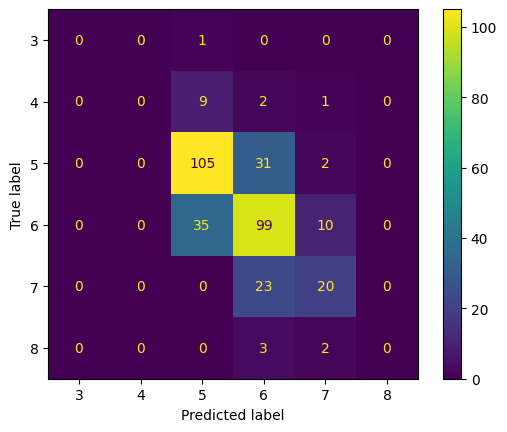

In [52]:
model.display_confusion()